# PROJET 4 - ANTICIPEZ LES BESOINS EN CONSOMMATION DE BATIMENTS
# ANALYSE EXPLORATOIRE
***

## 1 - NETTOYAGE DES DONNEES
***

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('data/2016_Building_Energy_Benchmarking.csv')
data.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


In [5]:
data.shape

(3376, 46)

In [6]:
data.dtypes.value_counts()

float64    22
object     15
int64       8
bool        1
Name: count, dtype: int64

In [7]:
len(data['OSEBuildingID'].unique().tolist())

3376

In [9]:
data.isna().mean()

OSEBuildingID                      0.000000
DataYear                           0.000000
BuildingType                       0.000000
PrimaryPropertyType                0.000000
PropertyName                       0.000000
Address                            0.000000
City                               0.000000
State                              0.000000
ZipCode                            0.004739
TaxParcelIdentificationNumber      0.000000
CouncilDistrictCode                0.000000
Neighborhood                       0.000000
Latitude                           0.000000
Longitude                          0.000000
YearBuilt                          0.000000
NumberofBuildings                  0.002370
NumberofFloors                     0.000000
PropertyGFATotal                   0.000000
PropertyGFAParking                 0.000000
PropertyGFABuilding(s)             0.000000
ListOfAllPropertyUseTypes          0.002666
LargestPropertyUseType             0.005924
LargestPropertyUseTypeGFA       

In [15]:
data.describe()

,OSEBuildingID,DataYear,ZipCode,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,...,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),Comments,TotalGHGEmissions,GHGEmissionsIntensity
count,3376.000000,3376.0,3360.000000,3376.000000,3376.000000,3376.000000,3376.000000,3368.000000,3376.000000,3.376000e+03,...,3.371000e+03,3.370000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,0.0,3367.000000,3367.000000
mean,21208.991114,2016.0,98116.949107,4.439277,47.624033,-122.334795,1968.573164,1.106888,4.709123,9.483354e+04,...,5.403667e+06,5.276726e+06,2.745959e+05,1.086639e+06,3.707612e+06,1.368505e+04,1.368505e+06,NaN,119.723971,1.175916
std,12223.757015,0.0,18.615205,2.120625,0.047758,0.027203,33.088156,2.108402,5.494465,2.188376e+05,...,2.161063e+07,1.593879e+07,3.912173e+06,4.352478e+06,1.485066e+07,6.709781e+04,6.709781e+06,NaN,538.832227,1.821452
min,1.000000,2016.0,98006.000000,1.000000,47.499170,-122.414250,1900.000000,0.000000,0.000000,1.128500e+04,...,0.000000e+00,0.000000e+00,0.000000e+00,-3.382680e+04,-1.154170e+05,0.000000e+00,0.000000e+00,NaN,-0.800000,-0.020000
25%,19990.750000,2016.0,98105.000000,3.000000,47.599860,-122.350662,1948.000000,1.000000,2.000000,2.848700e+04,...,9.251286e+05,9.701822e+05,0.000000e+00,1.874229e+05,6.394870e+05,0.000000e+00,0.000000e+00,NaN,9.495000,0.210000
50%,23112.000000,2016.0,98115.000000,4.000000,47.618675,-122.332495,1975.000000,1.000000,4.000000,4.417500e+04,...,1.803753e+06,1.904452e+06,0.000000e+00,3.451299e+05,1.177583e+06,3.237538e+03,3.237540e+05,NaN,33.920000,0.610000
75%,25994.250000,2016.0,98122.000000,7.000000,47.657115,-122.319407,1997.000000,1.000000,5.000000,9.099200e+04,...,4.222455e+06,4.381429e+06,0.000000e+00,8.293178e+05,2.829632e+06,1.189033e+04,1.189034e+06,NaN,93.940000,1.370000
max,50226.000000,2016.0,98272.000000,7.000000,47.733870,-122.220966,2015.000000,111.000000,99.000000,9.320156e+06,...,8.739237e+08,4.716139e+08,1.349435e+08,1.925775e+08,6.570744e+08,2.979090e+06,2.979090e+08,NaN,16870.980000,34.090000


In [17]:
#On ne s'intéresse qu'aux sites qui ne sont pas des habitations

data = data.loc[~data['BuildingType'].str.contains('Multifamily'),:]
data = data.loc[~data['PrimaryPropertyType'].str.contains('Multifamily'),:]

In [19]:
data['Outlier'].unique()

array([nan, 'High outlier', 'Low outlier'], dtype=object)

In [21]:
#On ne conserve que les échantillons qui ne sont pas des outliers

data = data.loc[data['Outlier'].isna(), :]

In [23]:
data['ComplianceStatus'].unique()

array(['Compliant', 'Error - Correct Default Data', 'Missing Data',
       'Non-Compliant'], dtype=object)

In [25]:
#On ne conserve que les batiments conformes

data = data.loc[data['ComplianceStatus'] == 'Compliant', :]

In [27]:
#On peut donc supprimer les colonnes 'ComplianceStatus' et 'Outlier'

data.drop(columns = ['ComplianceStatus', 'Outlier'], inplace = True)

In [29]:
data.shape

(1546, 44)

In [31]:
data.isna().mean()

OSEBuildingID                      0.000000
DataYear                           0.000000
BuildingType                       0.000000
PrimaryPropertyType                0.000000
PropertyName                       0.000000
Address                            0.000000
City                               0.000000
State                              0.000000
ZipCode                            0.008409
TaxParcelIdentificationNumber      0.000000
CouncilDistrictCode                0.000000
Neighborhood                       0.000000
Latitude                           0.000000
Longitude                          0.000000
YearBuilt                          0.000000
NumberofBuildings                  0.000000
NumberofFloors                     0.000000
PropertyGFATotal                   0.000000
PropertyGFAParking                 0.000000
PropertyGFABuilding(s)             0.000000
ListOfAllPropertyUseTypes          0.000000
LargestPropertyUseType             0.002587
LargestPropertyUseTypeGFA       

## 2 - ANALYSE DES DONNES
***

In [34]:
energy_features = ['TotalGHGEmissions',
                   'SiteEUI(kBtu/sf)',
                   'SiteEUIWN(kBtu/sf)',
                   'SourceEUI(kBtu/sf)',
                   'SourceEUIWN(kBtu/sf)',
                   'SiteEnergyUse(kBtu)',
                   'SiteEnergyUseWN(kBtu)',
                   'SteamUse(kBtu)',
                   'Electricity(kWh)',
                   'Electricity(kBtu)',
                   'NaturalGas(therms)',
                   'NaturalGas(kBtu)']

In [36]:
for feature in energy_features:
    data.loc[data[feature] < 0, feature] = 0

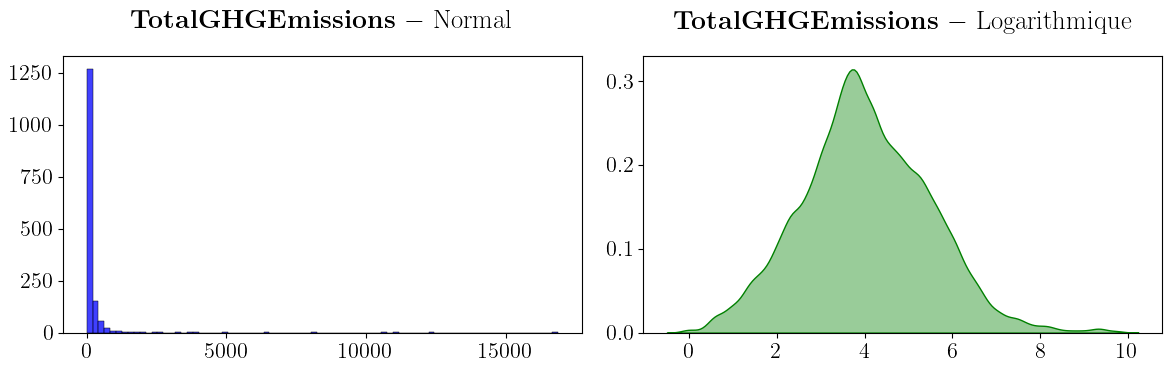

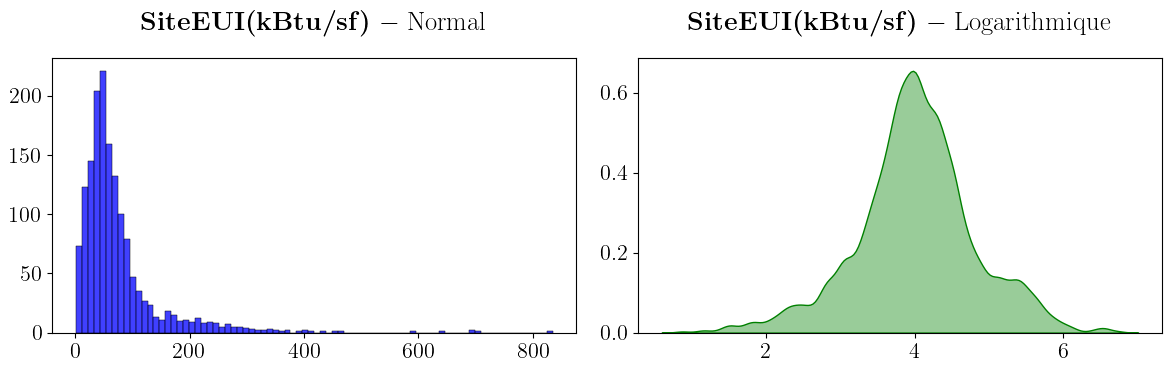

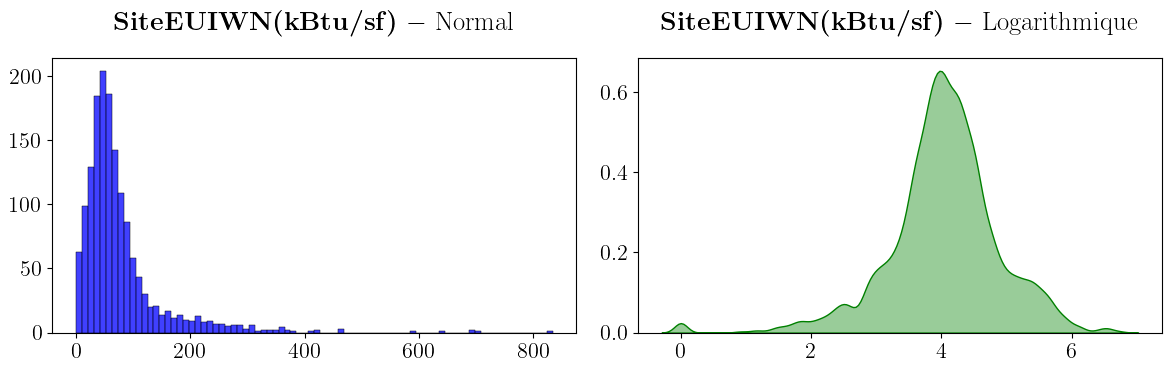

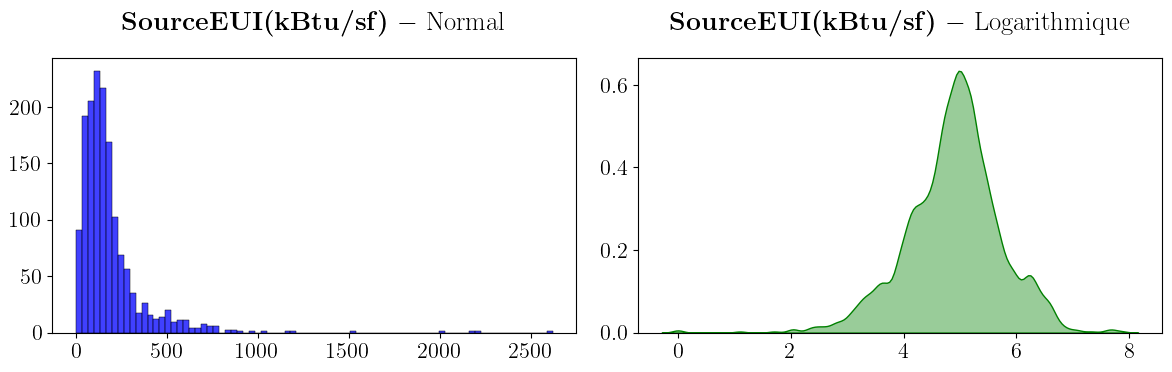

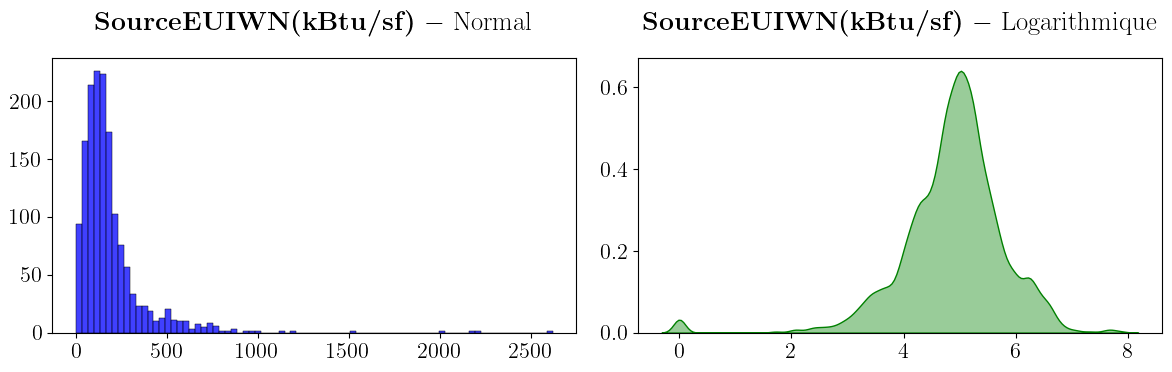

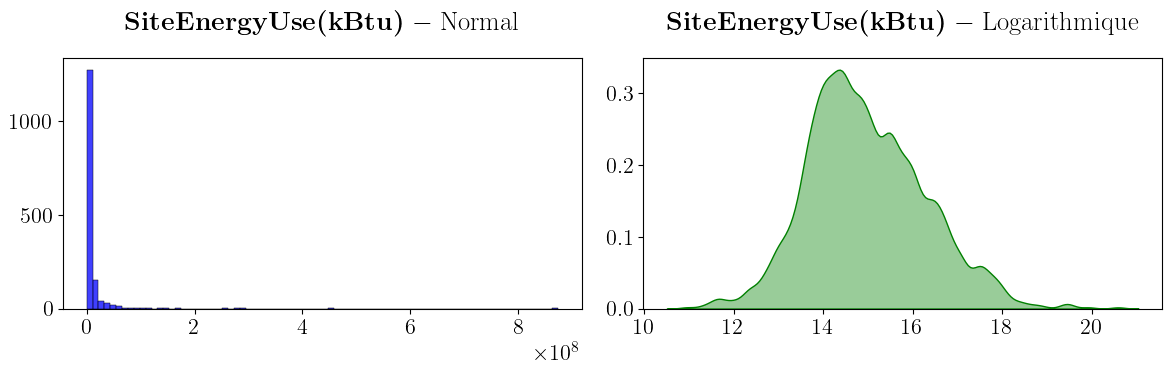

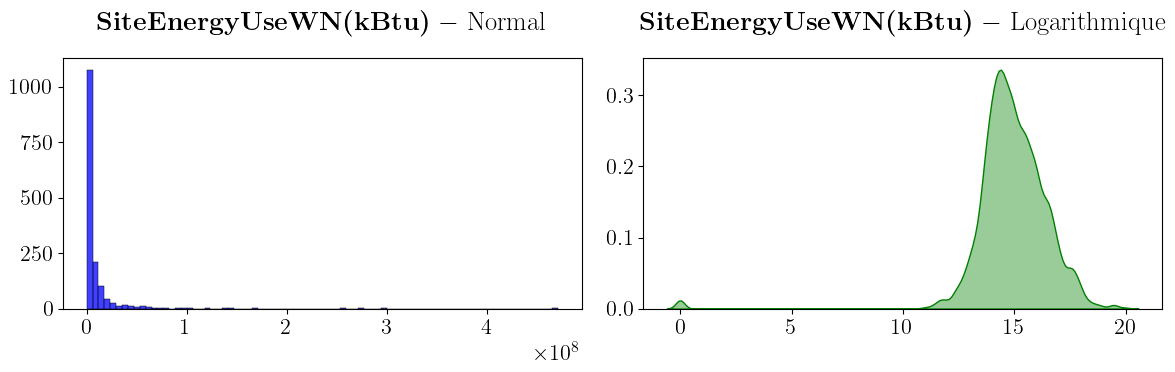

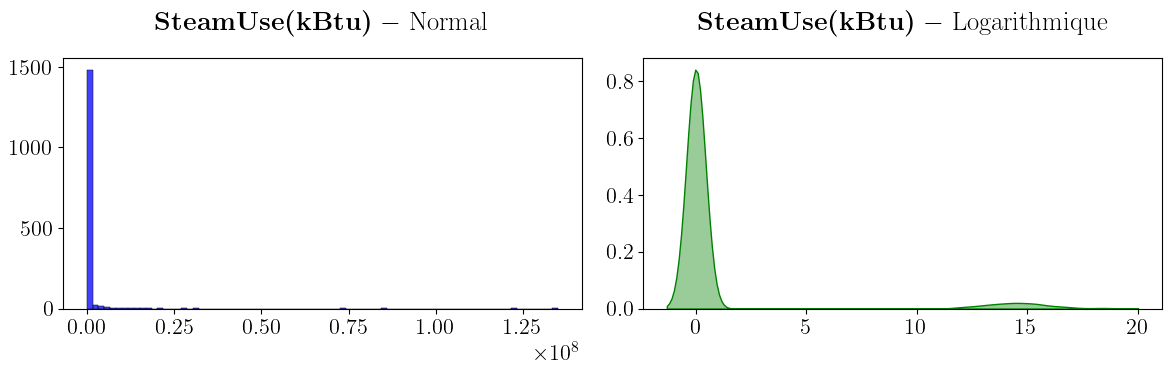

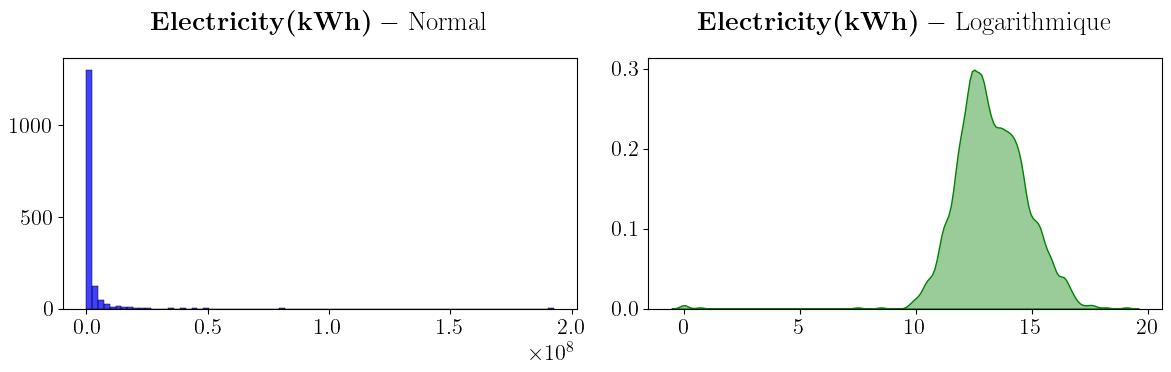

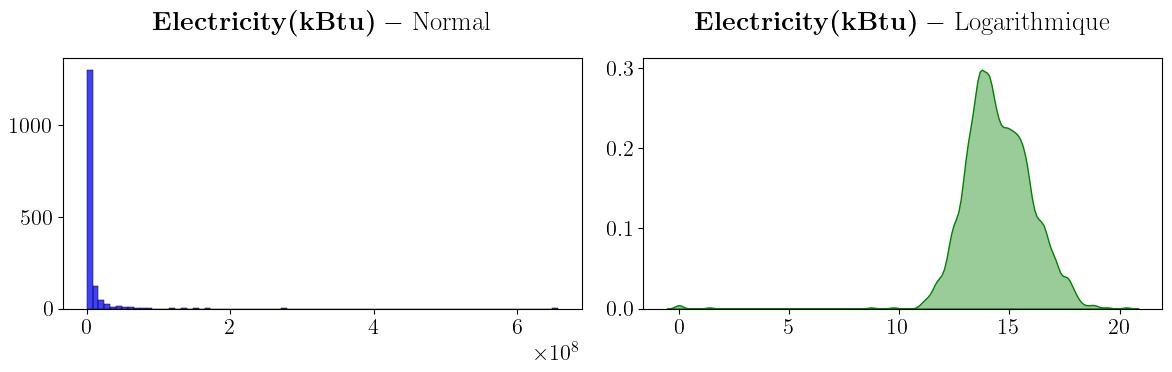

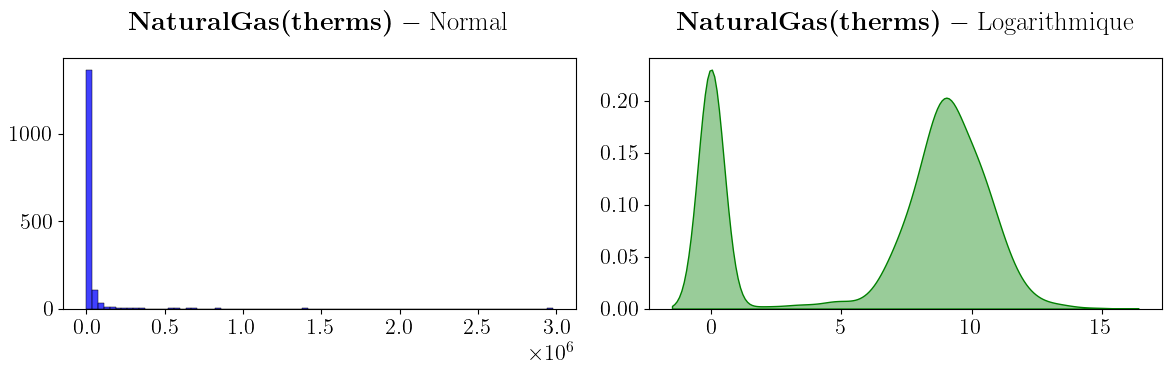

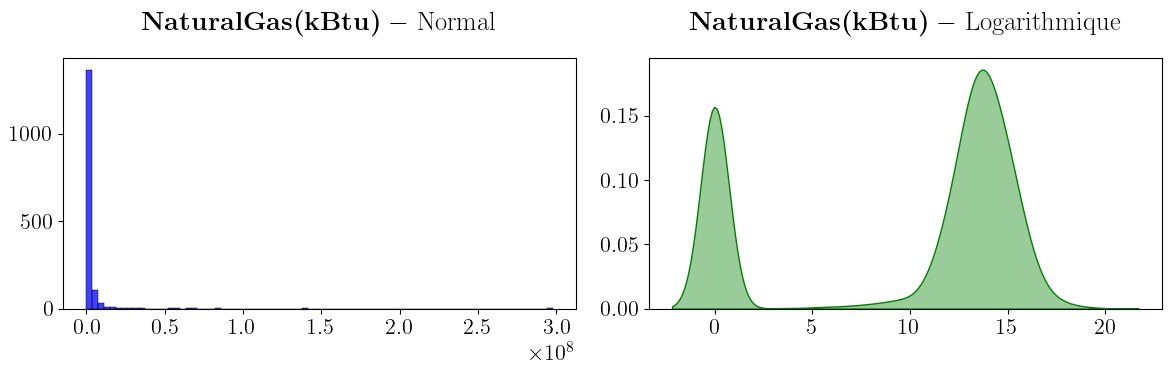

In [38]:
plt.rc('text', usetex = True)
plt.rc('font', family = 'serif', size = 16)

# Créer une grille de subplots avec 1 ligne et 2 colonnes

for feature in energy_features:
    fig, axes = plt.subplots(1,2, figsize = (12,4), gridspec_kw={'width_ratios':[1,1]})
    # Sélectionner les données de la feature
    x = data[feature]
    
    # Plot du subplot de gauche (distribution normale)
    sns.histplot(data=x, color='blue', ax=axes[0], bins = 80)
    axes[0].set_title(f"\\textbf{{{feature}}} $-$ Normal", pad=20)
    axes[0].set_xlabel('')
    axes[0].set_ylabel('')
    
    # Plot du subplot de droite (transformation logarithmique)
    transformed_x = (x + 1).apply(np.log)
    sns.kdeplot(data=transformed_x, fill=True, alpha=0.4, bw_adjust=0.5, color='green', ax=axes[1])
    axes[1].set_title(f"\\textbf{{{feature}}} $-$ Logarithmique", pad=20)
    axes[1].set_xlabel('')
    axes[1].set_ylabel('')

    # Ajuster l'espacement entre les subplots
    plt.tight_layout()
    
    #plt.savefig(f"dist_{feature.replace('/','.')}.pdf", bbox_inches='tight')
    # Afficher les subplots
    plt.show()

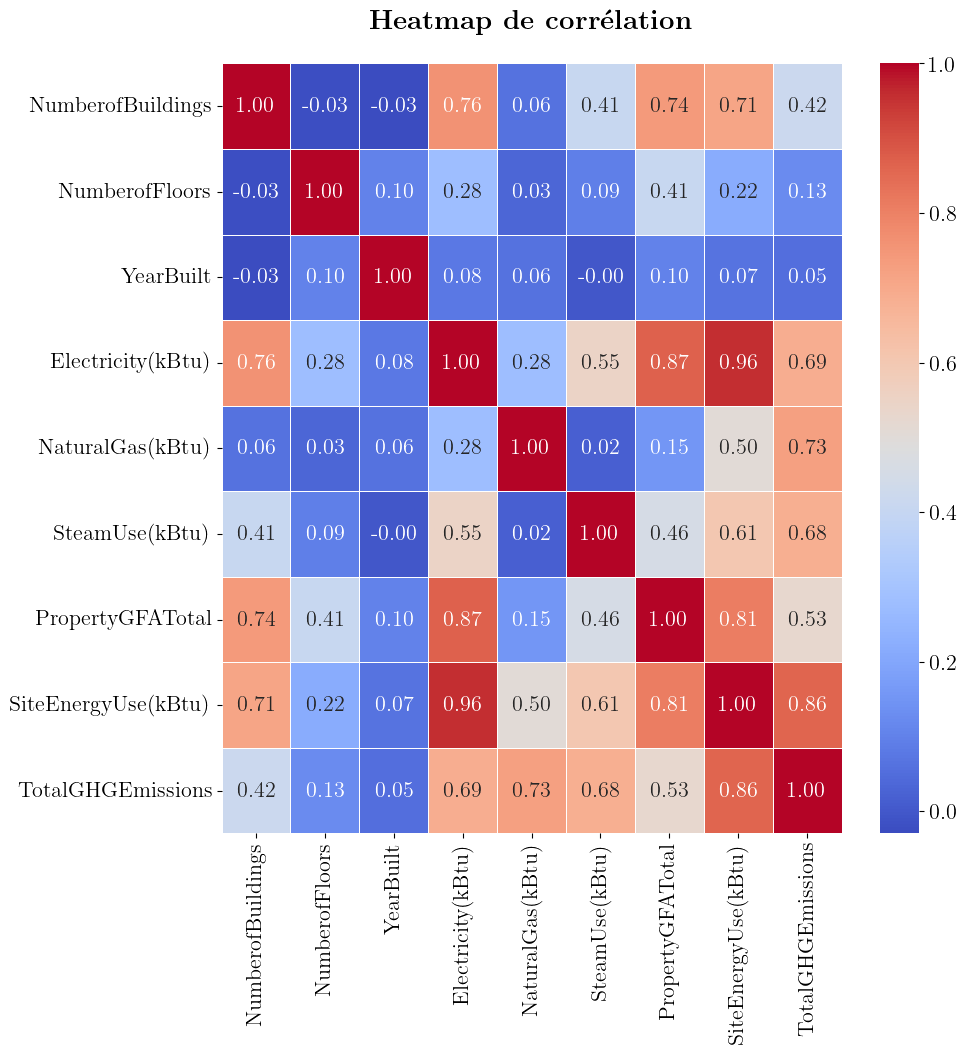

In [39]:
#On affiche la matrice de corrélation

plt.figure(figsize=(10,10))

global_features = ['NumberofBuildings', 'NumberofFloors', 'YearBuilt', 
                   'Electricity(kBtu)', 'NaturalGas(kBtu)', 'SteamUse(kBtu)', 
                   'PropertyGFATotal',
                   'SiteEnergyUse(kBtu)', 'TotalGHGEmissions']

heatmap_global = sns.heatmap(data[global_features].corr(), cmap = 'coolwarm', annot = True, fmt = '.2f', linewidths=0.5)
heatmap_global.set_title(f"\\textbf{{Heatmap de corrélation}}", pad = 25, size = 20)

cbar = heatmap_global.collections[0].colorbar
cbar.ax.tick_params(labelsize=16)

#plt.savefig(f"heatmap_corr.pdf", bbox_inches='tight')
plt.show()

In [42]:
#for feature in energy_features:
    #fig, axes = plt.subplots(1,2, figsize = (16,6), gridspec_kw={'width_ratios':[1,1]})
    #sns.scatterplot(x = data['NumberofBuildings'], y = data[feature], color = 'orange', marker='o', edgecolor = 'black', s = 60, ax = axes[0])
    #sns.scatterplot(x = data['NumberofFloors'], y = data[feature], color = 'orange', marker='o', edgecolor = 'black', s = 60, ax = axes[1])
    
    #plt.suptitle(f"\\textbf{{{feature}}}")
    #plt.show()

## 3 - SELECTION DES DONNEES
***

In [45]:
#On ne conserve que les entrées pour lesquelles LargestPropertyUseType est renseignée

data = data.loc[~data['LargestPropertyUseType'].isna(),:]

In [47]:
data.shape

(1542, 44)

In [49]:
#Réglage d'une mauvaise écriture

data.loc[data['PrimaryPropertyType'] == 'Small- and Mid-Sized Office', 'PrimaryPropertyType'] = 'Small and Mid-Sized Office'

In [51]:
#On crée de nouvelles features correspondant au pourcentage d'énergie par type d'énergie ainsi que l'age du batiment

data['ElectricityProp'] = data['Electricity(kBtu)'] / data['SiteEnergyUse(kBtu)']
data['SteamProp'] = data['SteamUse(kBtu)'] / data['SiteEnergyUse(kBtu)']
data['GasProp'] = data['NaturalGas(kBtu)'] / data['SiteEnergyUse(kBtu)']
data['Age'] = 2016 - data['YearBuilt']


data.drop(columns = ['Electricity(kBtu)', 'SteamUse(kBtu)', 'NaturalGas(kBtu)', 'YearBuilt'], inplace = True)

In [53]:
data.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'YearsENERGYSTARCertified',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'Electricity(kWh)', 'NaturalGas(therms)',
       'DefaultData', 'Comments', 'TotalGHGEmissions', 'GHGEmissionsIntensity',
       'ElectricityProp', 'SteamProp', 'GasProp', 'Age'],
      dtyp

In [55]:
#On supprime les colonnes inutiles

colonnes_drop = ['DataYear',
                 'PropertyName', #Inutile pour le ML
                 'Address', #Inutile pour le ML
                 'City', #Toutes les propriétés sont à Seattle
                 'State', #Toutes dans le même état
                 'ZipCode',
                 'TaxParcelIdentificationNumber',
                 'CouncilDistrictCode',
                 'Latitude',
                 'Longitude',
                 'ListOfAllPropertyUseTypes',
                 'YearsENERGYSTARCertified',
                 'Electricity(kWh)', #On l'a déjà en kBtu
                 'DefaultData',
                 'Comments']

data.drop(columns = colonnes_drop, inplace = True)

In [57]:
#En terme d'énergie, notre cible est la feature 'SiteEnergyUse(kBtu)'. On peut donc supprimer celles dont on n'a plus besoin.

data.drop(columns = ['SourceEUI(kBtu/sf)',
                     'SourceEUIWN(kBtu/sf)',
                     'SiteEUI(kBtu/sf)',
                     'SiteEUIWN(kBtu/sf)',
                     'SiteEnergyUseWN(kBtu)', 
                     'NaturalGas(therms)',
                     'GHGEmissionsIntensity'], inplace = True)

In [59]:
data.columns

Index(['OSEBuildingID', 'BuildingType', 'PrimaryPropertyType', 'Neighborhood',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SiteEnergyUse(kBtu)', 'TotalGHGEmissions',
       'ElectricityProp', 'SteamProp', 'GasProp', 'Age'],
      dtype='object')

In [61]:
data.isna().mean()

OSEBuildingID                      0.000000
BuildingType                       0.000000
PrimaryPropertyType                0.000000
Neighborhood                       0.000000
NumberofBuildings                  0.000000
NumberofFloors                     0.000000
PropertyGFATotal                   0.000000
PropertyGFAParking                 0.000000
PropertyGFABuilding(s)             0.000000
LargestPropertyUseType             0.000000
LargestPropertyUseTypeGFA          0.000000
SecondLargestPropertyUseType       0.454604
SecondLargestPropertyUseTypeGFA    0.454604
ThirdLargestPropertyUseType        0.774968
ThirdLargestPropertyUseTypeGFA     0.774968
ENERGYSTARScore                    0.355383
SiteEnergyUse(kBtu)                0.000000
TotalGHGEmissions                  0.000000
ElectricityProp                    0.000000
SteamProp                          0.000000
GasProp                            0.000000
Age                                0.000000
dtype: float64

In [71]:
#On règle les valeurs manquantes

data.loc[data['SecondLargestPropertyUseTypeGFA'].isna(), 'SecondLargestPropertyUseTypeGFA'] = 0
data.loc[data['ThirdLargestPropertyUseTypeGFA'].isna(), 'ThirdLargestPropertyUseTypeGFA'] = 0

data.loc[data['SecondLargestPropertyUseType'].isna(), 'SecondLargestPropertyUseType'] = 'NONE'
data.loc[data['ThirdLargestPropertyUseType'].isna(), 'ThirdLargestPropertyUseType'] = 'NONE'

In [73]:
data.isna().mean()

OSEBuildingID                      0.000000
BuildingType                       0.000000
PrimaryPropertyType                0.000000
Neighborhood                       0.000000
NumberofBuildings                  0.000000
NumberofFloors                     0.000000
PropertyGFATotal                   0.000000
PropertyGFAParking                 0.000000
PropertyGFABuilding(s)             0.000000
LargestPropertyUseType             0.000000
LargestPropertyUseTypeGFA          0.000000
SecondLargestPropertyUseType       0.000000
SecondLargestPropertyUseTypeGFA    0.000000
ThirdLargestPropertyUseType        0.000000
ThirdLargestPropertyUseTypeGFA     0.000000
ENERGYSTARScore                    0.355383
SiteEnergyUse(kBtu)                0.000000
TotalGHGEmissions                  0.000000
ElectricityProp                    0.000000
SteamProp                          0.000000
GasProp                            0.000000
Age                                0.000000
dtype: float64

In [75]:
#On crée de nouvelles features égales au pourcentage de surface correspondant aux utilisations primaires et secondaires

data['BuildingArea'] = data['PropertyGFABuilding(s)'] / data['PropertyGFATotal']
data['ParkingArea'] = data['PropertyGFAParking'] / data['PropertyGFATotal']

data['LargestUsedArea'] = data['LargestPropertyUseTypeGFA'] / data['PropertyGFATotal']
data['SecondLargestUsedArea'] = data['SecondLargestPropertyUseTypeGFA'] / data['PropertyGFATotal']



#On vérifier qu'il n'y ait pas d'incohérences.

data[['BuildingArea', 'ParkingArea', 'LargestUsedArea', 'SecondLargestUsedArea']].describe()

,BuildingArea,ParkingArea,LargestUsedArea,SecondLargestUsedArea
count,1542.000000,1542.000000,1542.000000,1542.000000
mean,0.934663,0.065337,0.861520,0.130675
std,0.144038,0.144038,0.312549,0.174045
min,0.104977,0.000000,0.186469,0.000000
25%,1.000000,0.000000,0.674258,0.000000
50%,1.000000,0.000000,0.939421,0.000000
75%,1.000000,0.000000,1.000000,0.250000
max,1.000000,0.895023,6.426849,1.452054


In [79]:
#Si on supprime les incohérences

print('-' * 80)
print("Si on supprime toutes les incohérences, on n'aurait plus que", data.loc[(data['LargestUsedArea'] < 1) & (data['SecondLargestUsedArea'] < 1),:].shape[0], "entrées sur", data.shape[0])
print('_' * 80)

--------------------------------------------------------------------------------
Si on supprime toutes les incohérences, on n'aurait plus que 885 entrées sur 1542
________________________________________________________________________________


In [81]:
#On règle les incohérences

data.loc[data['LargestUsedArea'] > 1, 'LargestUsedArea'] = 1
data.loc[data['LargestUsedArea'] == 1, 'SecondLargestUsedArea'] = 0


#On revérifie

data[['BuildingArea', 'ParkingArea', 'LargestUsedArea', 'SecondLargestUsedArea']].describe()

,BuildingArea,ParkingArea,LargestUsedArea,SecondLargestUsedArea
count,1542.000000,1542.000000,1542.000000,1542.000000
mean,0.934663,0.065337,0.832461,0.116514
std,0.144038,0.144038,0.202480,0.157161
min,0.104977,0.000000,0.186469,0.000000
25%,1.000000,0.000000,0.674258,0.000000
50%,1.000000,0.000000,0.939421,0.000000
75%,1.000000,0.000000,1.000000,0.230160
max,1.000000,0.895023,1.000000,0.723540


In [91]:
#On se débarasse des features qui ne sont plus utiles

data.drop(columns = ['PropertyGFABuilding(s)', 'PropertyGFAParking', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA'], inplace = True)

In [83]:
#On vérifie qu'il n'y ait pas d'incohérences sur les variables de proportions d'énergie créées antérieurement

data[['ElectricityProp', 'SteamProp', 'GasProp']].describe()

,ElectricityProp,SteamProp,GasProp
count,1542.000000,1542.000000,1542.000000
mean,0.699680,0.022598,0.274147
std,0.264126,0.094220,0.264163
min,0.000000,0.000000,0.000000
25%,0.489827,0.000000,0.000000
50%,0.705083,0.000000,0.232502
75%,0.999980,0.000000,0.489492
max,1.000003,0.766987,1.000000


In [85]:
#Réglage des incohérences pour l'électricité

data.loc[data['ElectricityProp'] > 1, 'ElectricityProp'] = 1

In [93]:
#On vérifie que toutes les valeurs manquantes aient été imputées

data.isna().mean()

OSEBuildingID                     0.000000
BuildingType                      0.000000
PrimaryPropertyType               0.000000
Neighborhood                      0.000000
NumberofBuildings                 0.000000
NumberofFloors                    0.000000
PropertyGFATotal                  0.000000
LargestPropertyUseType            0.000000
SecondLargestPropertyUseType      0.000000
ThirdLargestPropertyUseType       0.000000
ThirdLargestPropertyUseTypeGFA    0.000000
ENERGYSTARScore                   0.355383
SiteEnergyUse(kBtu)               0.000000
TotalGHGEmissions                 0.000000
ElectricityProp                   0.000000
SteamProp                         0.000000
GasProp                           0.000000
Age                               0.000000
BuildingArea                      0.000000
ParkingArea                       0.000000
LargestUsedArea                   0.000000
SecondLargestUsedArea             0.000000
dtype: float64

In [202]:
#On supprime les colonnes inutiles et on les regroupe dans un autre datafame

data_bis = data.drop(columns = ['OSEBuildingID', 'BuildingType', 'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA'])

data_bis.columns.tolist()

['PrimaryPropertyType',
 'Neighborhood',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'LargestPropertyUseType',
 'SecondLargestPropertyUseType',
 'ENERGYSTARScore',
 'SiteEnergyUse(kBtu)',
 'TotalGHGEmissions',
 'ElectricityProp',
 'SteamProp',
 'GasProp',
 'Age',
 'BuildingArea',
 'ParkingArea',
 'LargestUsedArea',
 'SecondLargestUsedArea']

In [204]:
#On créé les dataframes dont on se servira pour les modélisations. Deux dataframes sans ENERGYSTARScore et deux avec.

data_energy = data_bis.drop(columns = ['NumberofFloors', 'ENERGYSTARScore', 'TotalGHGEmissions'])
data_ghg = data_bis.drop(columns = ['NumberofFloors', 'ENERGYSTARScore', 'SiteEnergyUse(kBtu)'])
data_energystar = data_bis.loc[~data_bis['ENERGYSTARScore'].isna(), :].drop(columns = ['NumberofFloors', 'TotalGHGEmissions'])
data_ghgstar = data_bis.loc[~data_bis['ENERGYSTARScore'].isna(), :].drop(columns = ['NumberofFloors', 'SiteEnergyUse(kBtu)'])


#On réinitialise les index

data_energy.reset_index(drop = True, inplace = True)
data_ghg.reset_index(drop = True, inplace = True)
data_energystar.reset_index(drop = True, inplace = True)
data_ghgstar.reset_index(drop = True, inplace = True)

In [206]:
data_energy.describe()

,NumberofBuildings,PropertyGFATotal,SiteEnergyUse(kBtu),ElectricityProp,SteamProp,GasProp,Age,BuildingArea,ParkingArea,LargestUsedArea,SecondLargestUsedArea
count,1542.000000,1.542000e+03,1.542000e+03,1542.000000,1542.000000,1542.000000,1542.000000,1542.000000,1542.000000,1542.000000,1542.000000
mean,1.178988,1.215520e+05,8.882576e+06,0.699680,0.022598,0.274147,54.322957,0.934663,0.065337,0.832461,0.116514
std,3.045044,3.068646e+05,3.136434e+07,0.264126,0.094220,0.264163,32.859317,0.144038,0.144038,0.202480,0.157161
min,0.000000,1.128500e+04,5.713320e+04,0.000000,0.000000,0.000000,1.000000,0.104977,0.000000,0.186469,0.000000
25%,1.000000,2.884175e+04,1.248602e+06,0.489827,0.000000,0.000000,27.000000,1.000000,0.000000,0.674258,0.000000
50%,1.000000,4.812550e+04,2.727768e+06,0.705083,0.000000,0.232502,50.000000,1.000000,0.000000,0.939421,0.000000
75%,1.000000,1.078405e+05,7.328298e+06,0.999980,0.000000,0.489492,86.000000,1.000000,0.000000,1.000000,0.230160
max,111.000000,9.320156e+06,8.739237e+08,1.000000,0.766987,1.000000,116.000000,1.000000,0.895023,1.000000,0.723540


In [208]:
data_energystar.describe()

,NumberofBuildings,PropertyGFATotal,ENERGYSTARScore,SiteEnergyUse(kBtu),ElectricityProp,SteamProp,GasProp,Age,BuildingArea,ParkingArea,LargestUsedArea,SecondLargestUsedArea
count,994.000000,9.940000e+02,994.000000,9.940000e+02,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000
mean,1.022133,1.301368e+05,63.656942,8.898371e+06,0.719955,0.023075,0.253846,52.796781,0.927505,0.072495,0.862041,0.100699
std,0.515141,2.124846e+05,28.830232,2.585920e+07,0.266226,0.095297,0.263103,31.969285,0.142725,0.142725,0.177002,0.149160
min,0.000000,1.630000e+04,1.000000,7.971180e+04,0.000000,0.000000,0.000000,1.000000,0.104977,0.000000,0.264663,0.000000
25%,1.000000,3.153300e+04,44.000000,1.269488e+06,0.510508,0.000000,0.000000,28.000000,1.000000,0.000000,0.737937,0.000000
50%,1.000000,5.367500e+04,71.000000,2.815681e+06,0.754630,0.000000,0.181093,48.000000,1.000000,0.000000,0.979944,0.000000
75%,1.000000,1.275558e+05,88.000000,7.760968e+06,0.999999,0.000000,0.467618,78.750000,1.000000,0.000000,1.000000,0.199845
max,9.000000,1.952220e+06,100.000000,4.483853e+08,1.000000,0.701754,0.995545,116.000000,1.000000,0.895023,1.000000,0.723540


In [210]:
data_ghg.describe()

,NumberofBuildings,PropertyGFATotal,TotalGHGEmissions,ElectricityProp,SteamProp,GasProp,Age,BuildingArea,ParkingArea,LargestUsedArea,SecondLargestUsedArea
count,1542.000000,1.542000e+03,1542.000000,1542.000000,1542.000000,1542.000000,1542.000000,1542.000000,1542.000000,1542.000000,1542.000000
mean,1.178988,1.215520e+05,194.165629,0.699680,0.022598,0.274147,54.322957,0.934663,0.065337,0.832461,0.116514
std,3.045044,3.068646e+05,780.562831,0.264126,0.094220,0.264163,32.859317,0.144038,0.144038,0.202480,0.157161
min,0.000000,1.128500e+04,0.000000,0.000000,0.000000,0.000000,1.000000,0.104977,0.000000,0.186469,0.000000
25%,1.000000,2.884175e+04,20.505000,0.489827,0.000000,0.000000,27.000000,1.000000,0.000000,0.674258,0.000000
50%,1.000000,4.812550e+04,50.015000,0.705083,0.000000,0.232502,50.000000,1.000000,0.000000,0.939421,0.000000
75%,1.000000,1.078405e+05,147.402500,0.999980,0.000000,0.489492,86.000000,1.000000,0.000000,1.000000,0.230160
max,111.000000,9.320156e+06,16870.980000,1.000000,0.766987,1.000000,116.000000,1.000000,0.895023,1.000000,0.723540


In [212]:
data_ghgstar.describe()

,NumberofBuildings,PropertyGFATotal,ENERGYSTARScore,TotalGHGEmissions,ElectricityProp,SteamProp,GasProp,Age,BuildingArea,ParkingArea,LargestUsedArea,SecondLargestUsedArea
count,994.000000,9.940000e+02,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000
mean,1.022133,1.301368e+05,63.656942,195.566579,0.719955,0.023075,0.253846,52.796781,0.927505,0.072495,0.862041,0.100699
std,0.515141,2.124846e+05,28.830232,862.979080,0.266226,0.095297,0.263103,31.969285,0.142725,0.142725,0.177002,0.149160
min,0.000000,1.630000e+04,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.104977,0.000000,0.264663,0.000000
25%,1.000000,3.153300e+04,44.000000,20.292500,0.510508,0.000000,0.000000,28.000000,1.000000,0.000000,0.737937,0.000000
50%,1.000000,5.367500e+04,71.000000,50.025000,0.754630,0.000000,0.181093,48.000000,1.000000,0.000000,0.979944,0.000000
75%,1.000000,1.275558e+05,88.000000,144.695000,0.999999,0.000000,0.467618,78.750000,1.000000,0.000000,1.000000,0.199845
max,9.000000,1.952220e+06,100.000000,16870.980000,1.000000,0.701754,0.995545,116.000000,1.000000,0.895023,1.000000,0.723540


In [214]:
#On les sauvegarde pour les utiliser dans les notebooks traitant la modélisation

data_energy.to_csv('data/data_energy.csv', index = False)
data_energystar.to_csv('data/data_energystar.csv', index = False)
data_ghg.to_csv('data/data_ghg.csv', index = False)
data_ghgstar.to_csv('data/data_ghgstar.csv', index = False)